# Back Propagation

## Motivation
We want to work out a more universal way to compute gradients in order to modulize our computing for different models/losses.
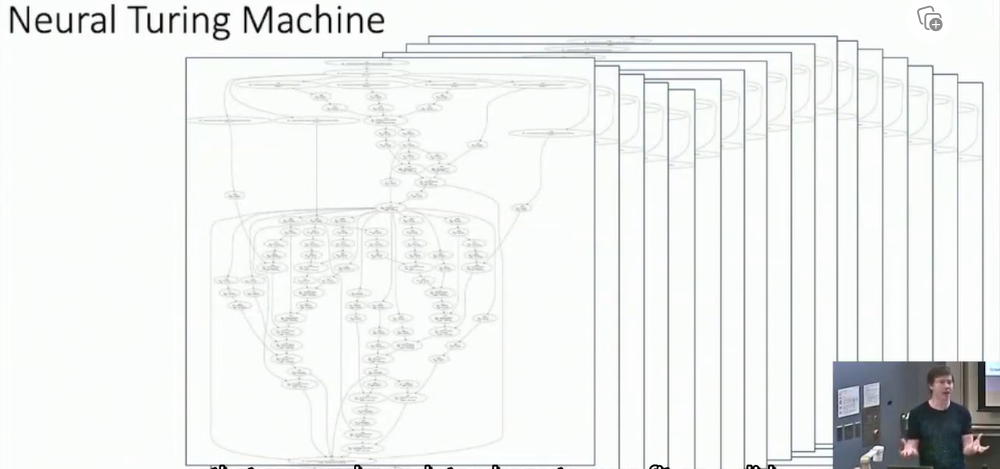
## Computational Gragh
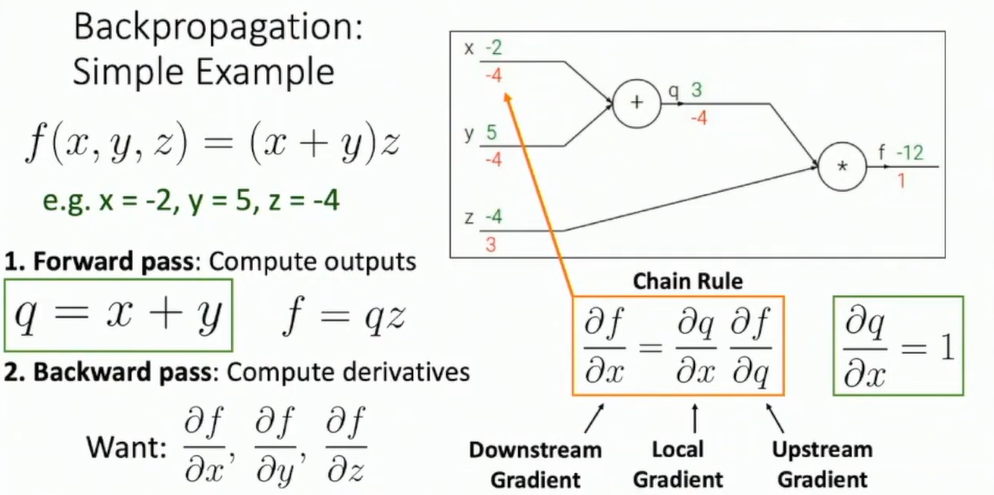
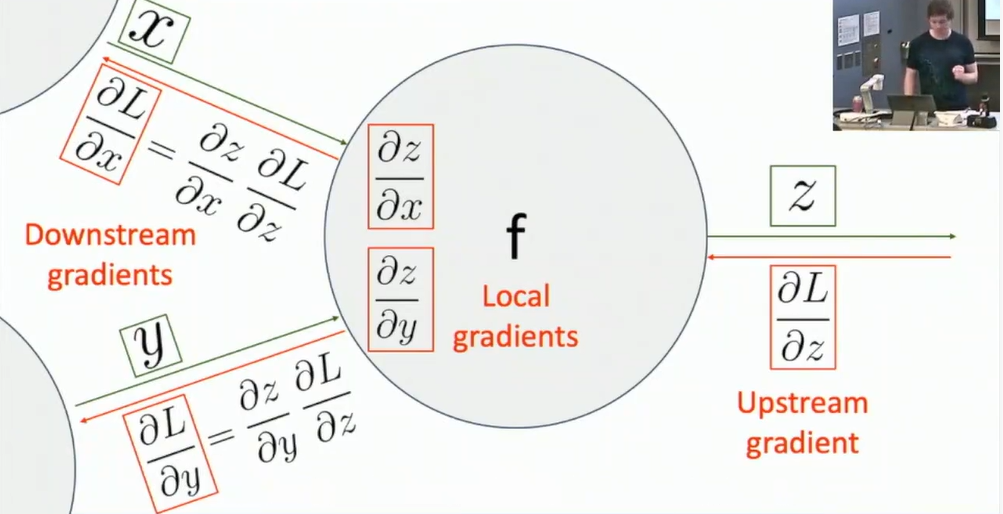
Each node only operates locally with similar constructure.
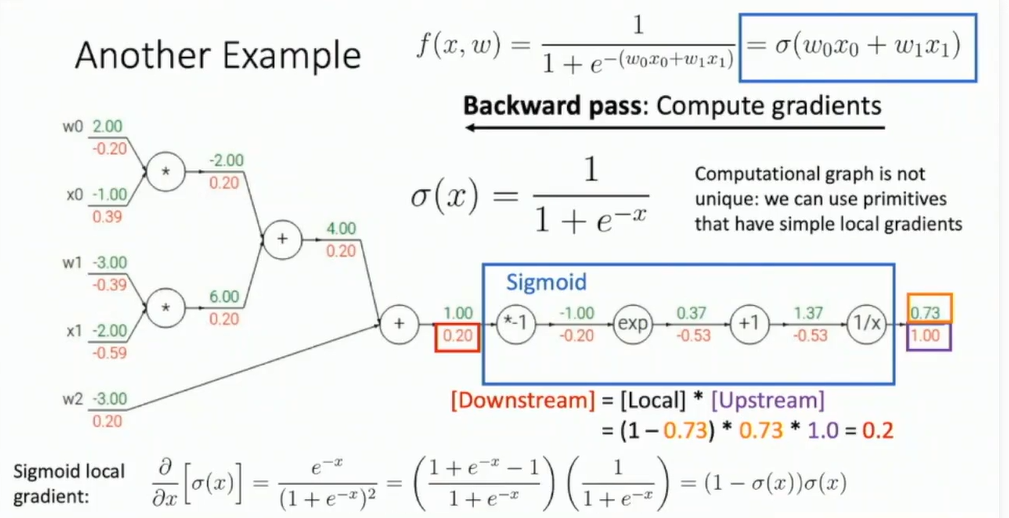
Defining more complex primitives in the gragh
- more semantic meaning
- more effecient

And we might notice some dualities in the information flow in backward and forward.
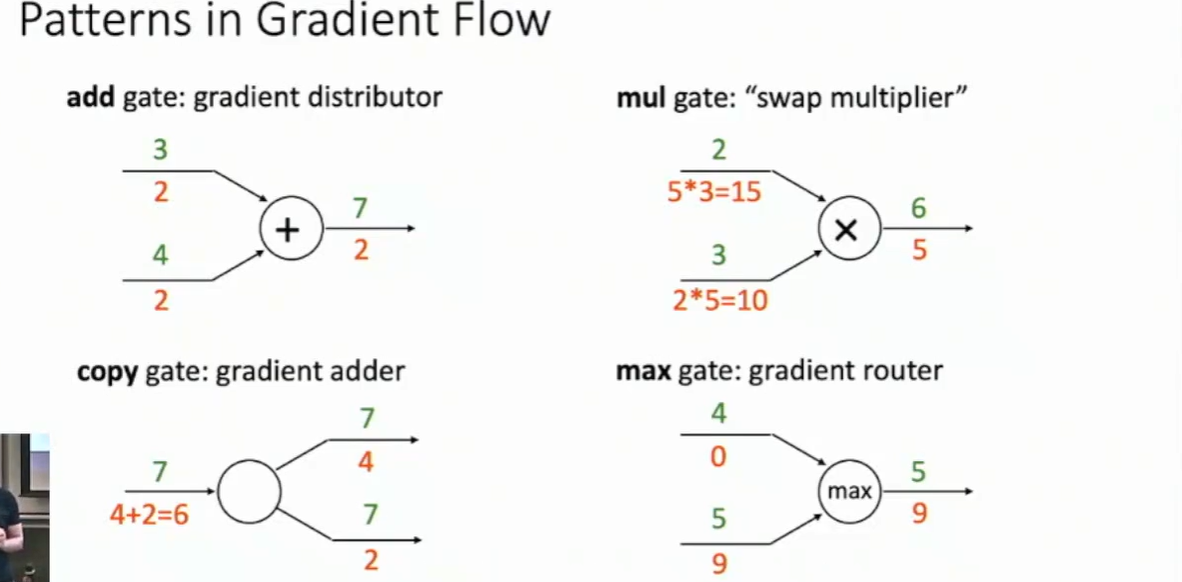
The max gate acts as a "gradient router"! This may imply some problem in getting good gradient flow in the entire model.

## Backprop Implementation: Flat gradient code
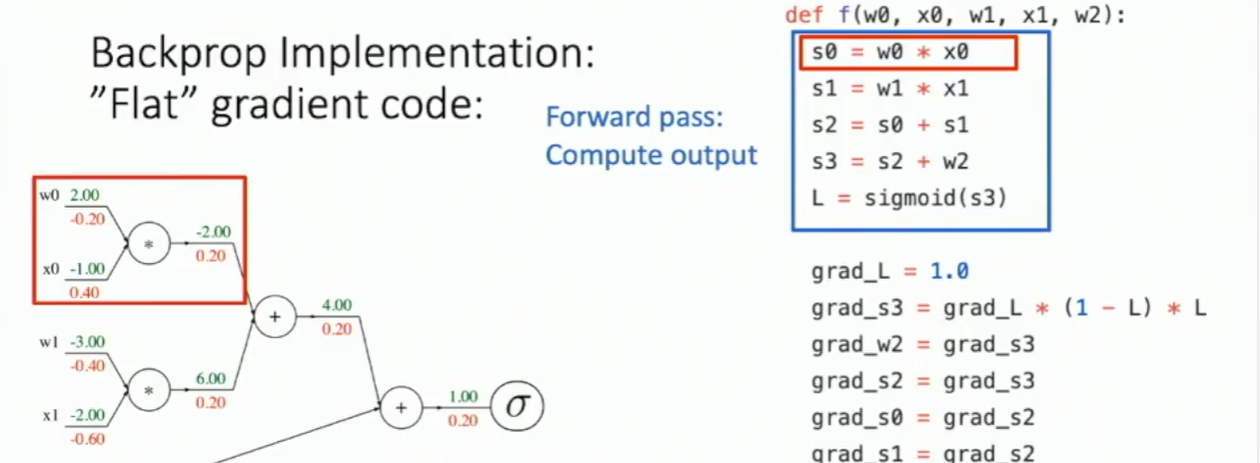
But this method does not work for modularization. We still need to mannually compute different gradients for different losses/activation func...

## Backprop Implementation: Modular API
### Pytorch Autograd Functions
Though pytorch can do autograd, but sometimes we need to define the derivative process.   
Use Extending troch.autograd to define our own NODE in computational gragh.

In [ ]:
import torch

In [ ]:
class Multiply(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, y):
        ctx.save_for_backward(x, y)#
        z = x * y
        return z
    @staticmethod
    def backward(ctx, grad_z):# get context we saved in forward and upstream gradient
        x, y = ctx.saved_tensors
        grad_x = y * grad_z
        grad_y = x * grad_z
        return grad_x, grad_y

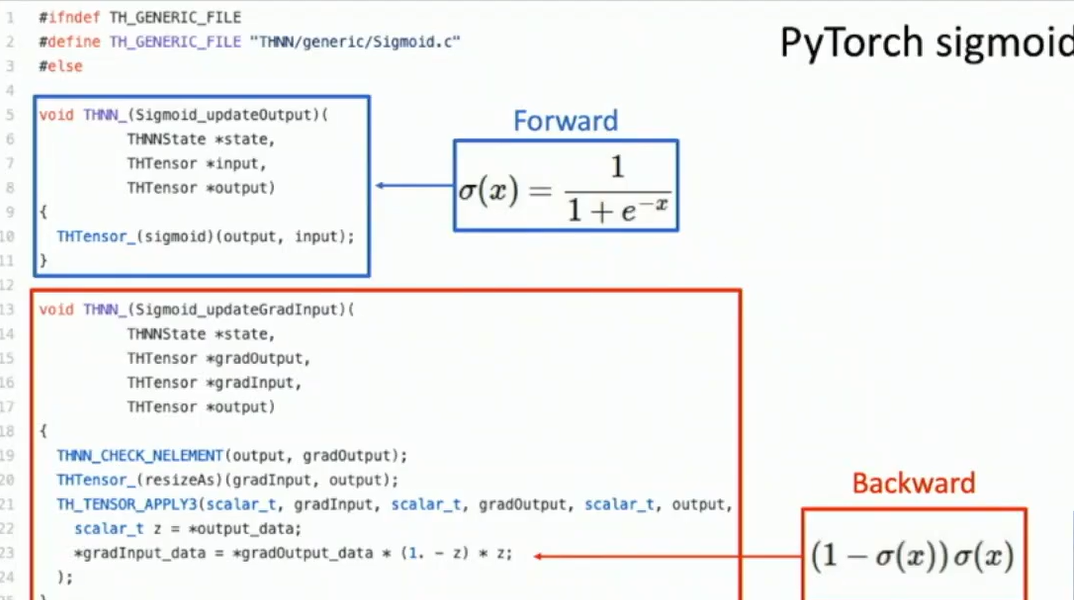

## Backprop with Vectors
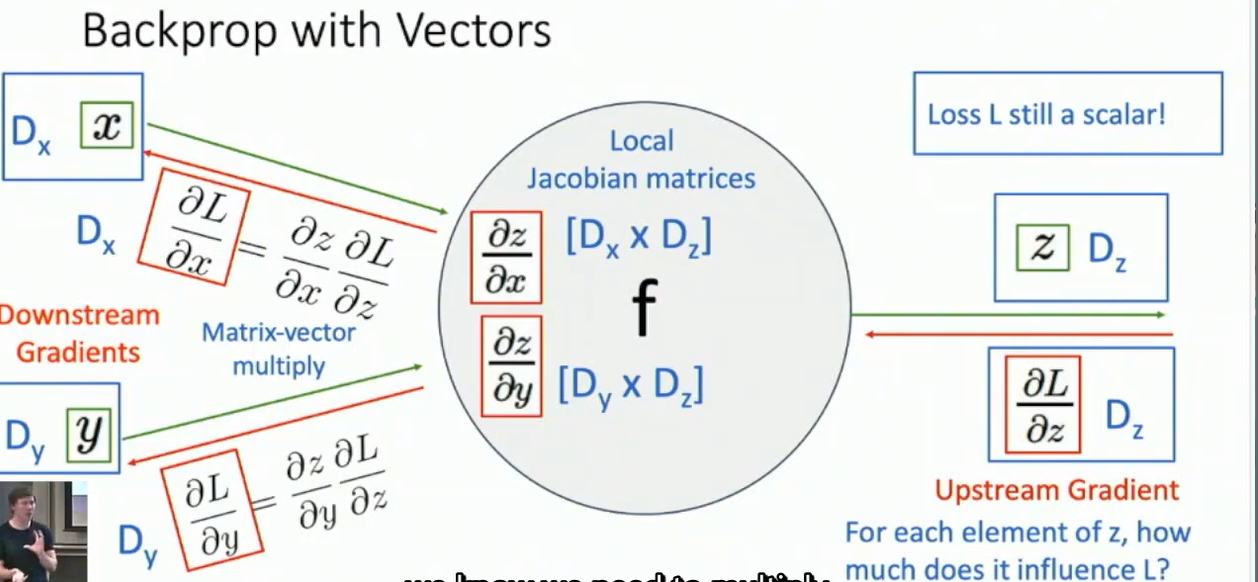
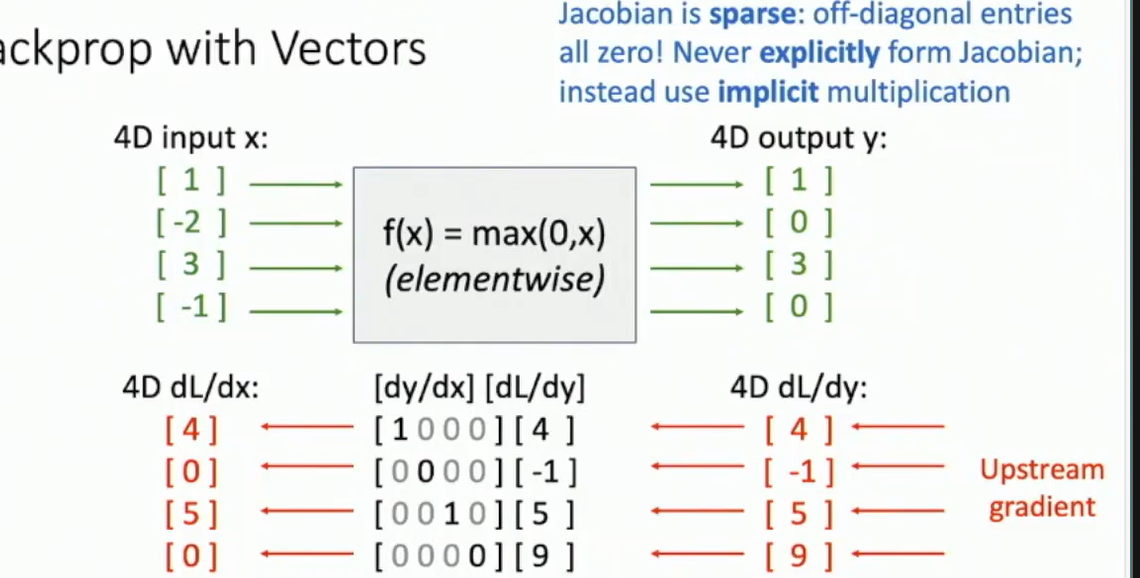  
Here we make use of the structure of RELU to deal with large sparse matrix for efficiency.
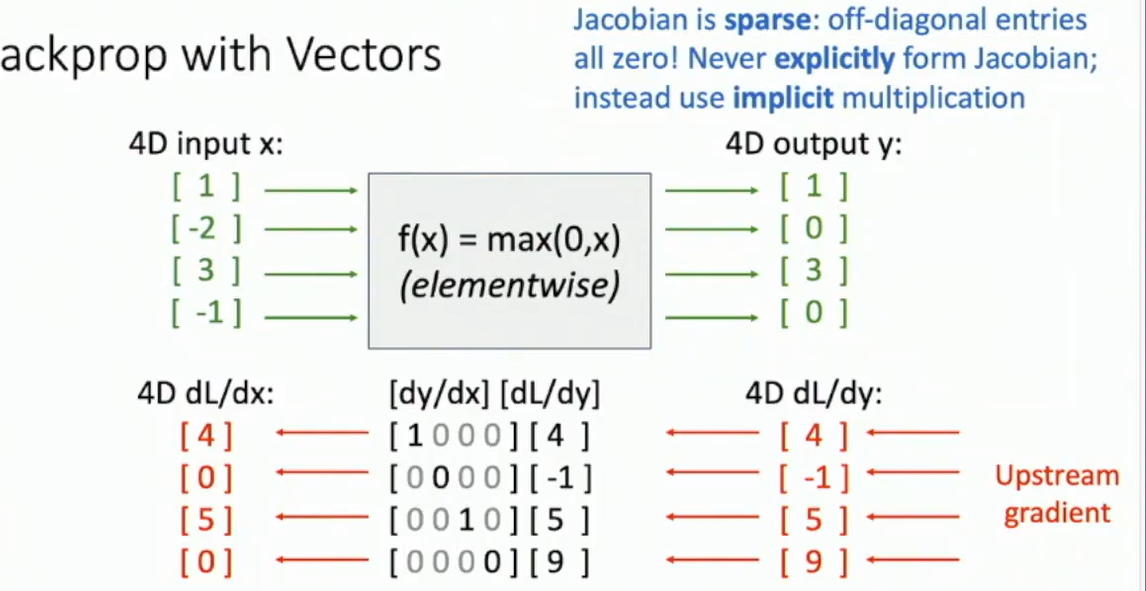

## Backprop with Matrices
- Loss L is stll scalar 
- dL/dx always has the same shape as x(as it indicates the impact of each element of x on L)
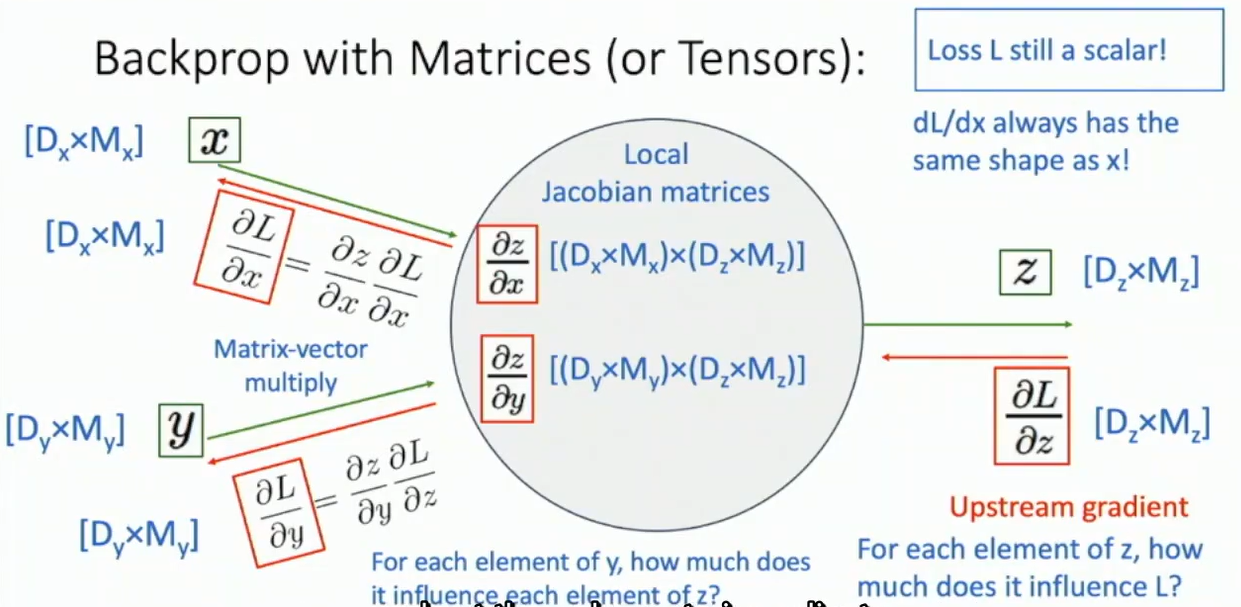
Bravo!  
An efficient way to think and compute the gradient matrix!
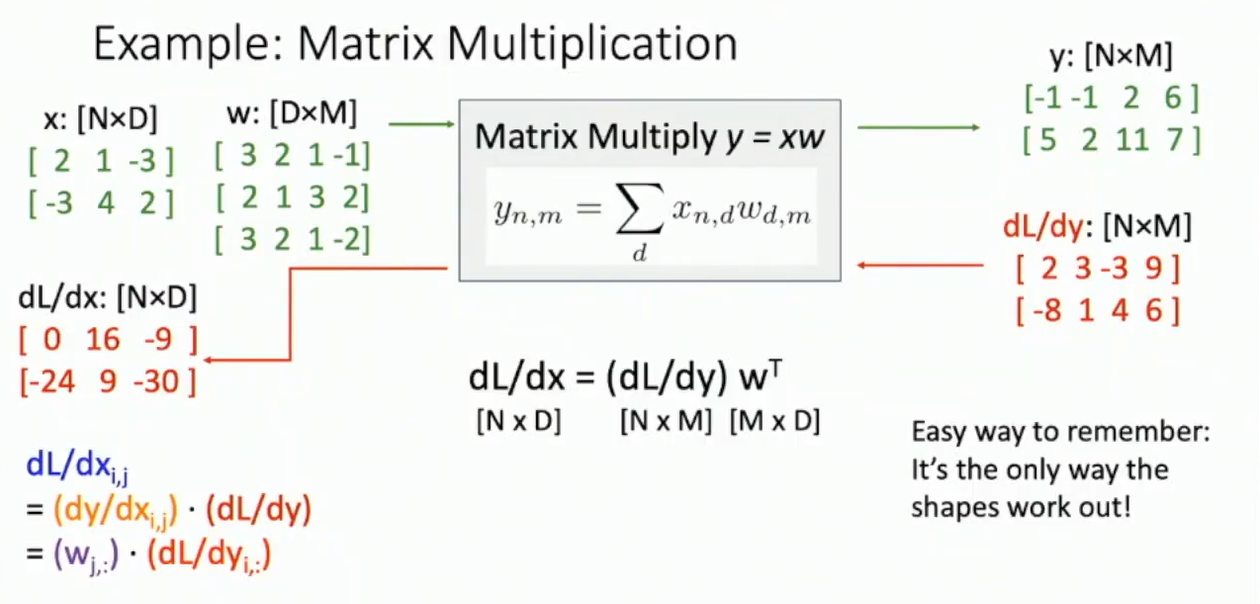
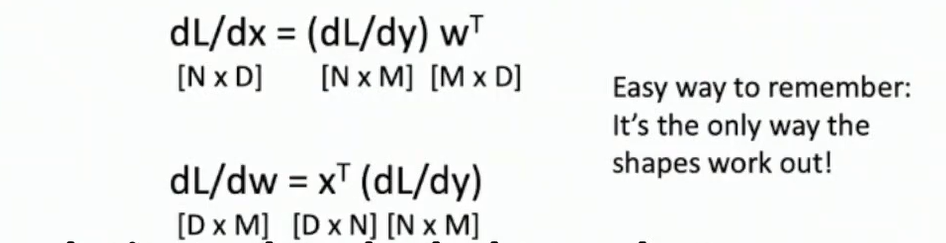

## Backprop: Another View
### Reverse Mode Automatic Differentiation
The backpropagation is based on chain rule, which requires matrix multiplication.     
Matrix multiplication is associative: we can compute products in any order.    
$$ ABC = A(BC) $$
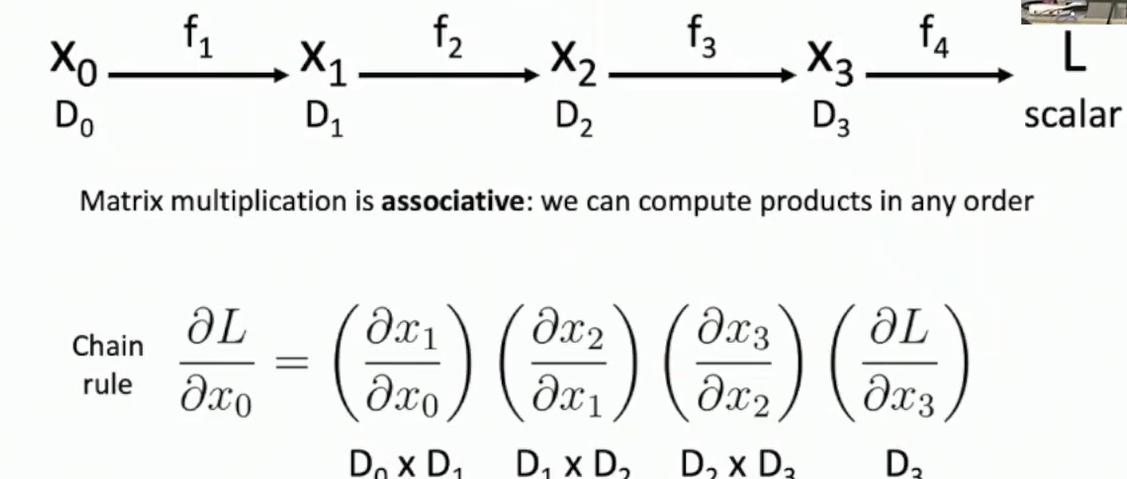
And in backprop, we choose the particular grouping or order of computing these products that we only need to do matrix-vector multiplication.
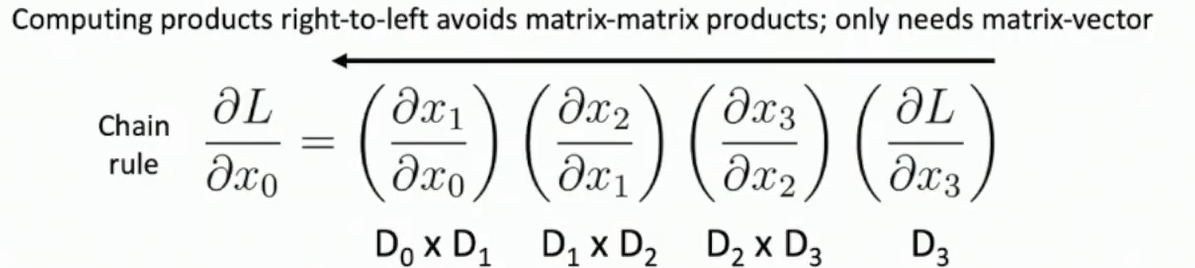
### Forward-Mode Automatic Differentiation
There's much more beyongd machine learning!   
And the idea of automatic differentiation applies beyond ML!  
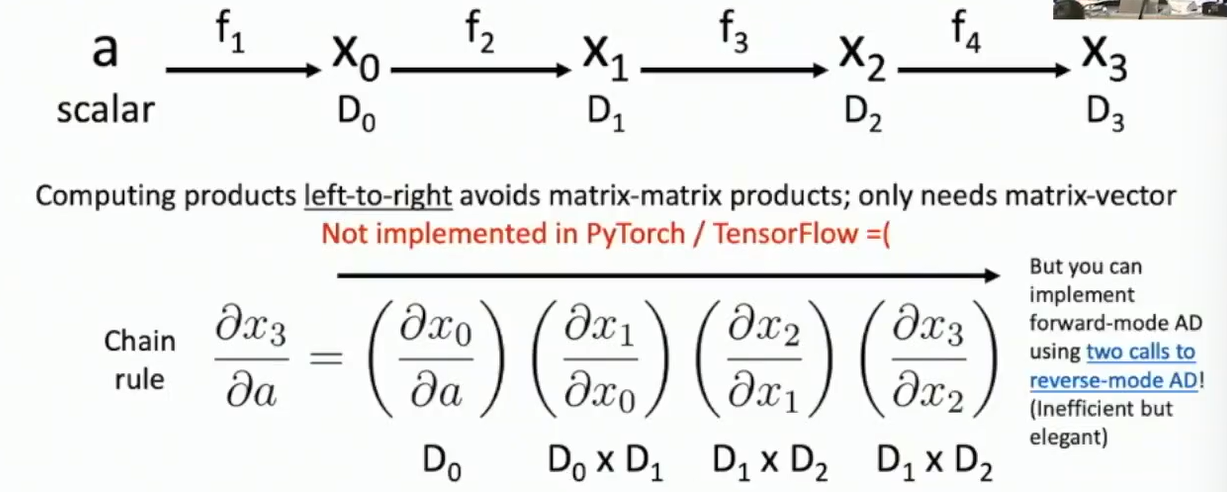

## Backprop: Higher-Order Derivatives
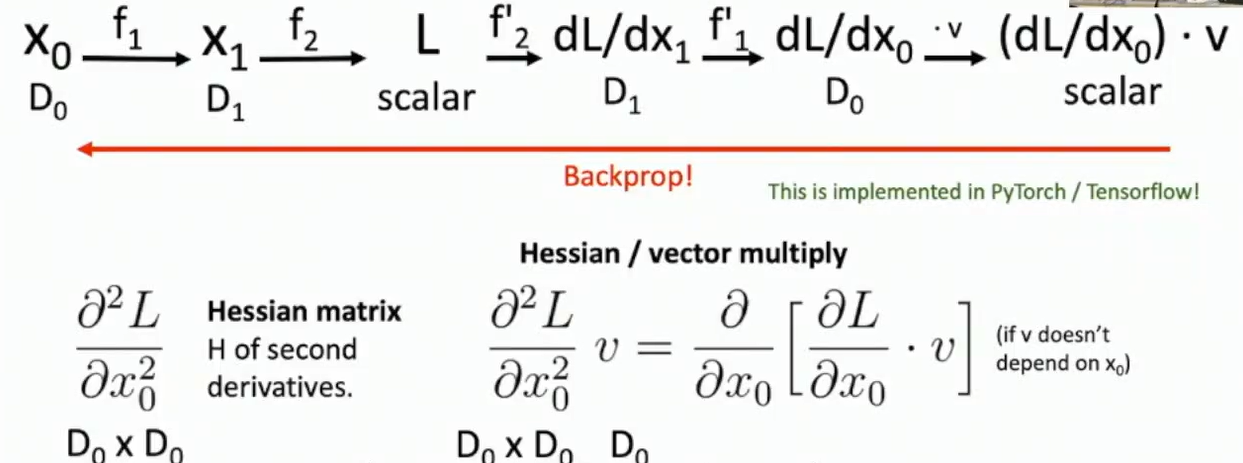
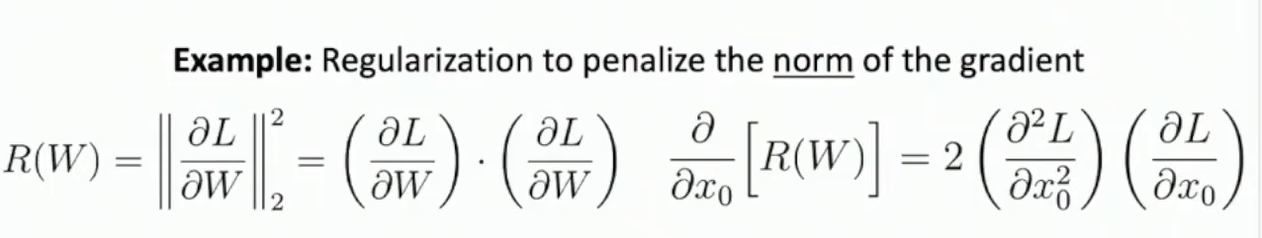